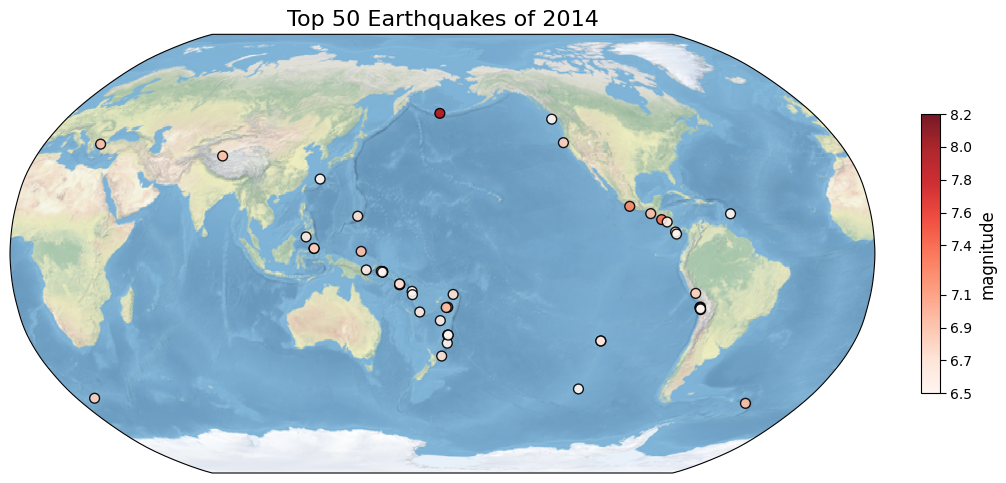

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
df = pd.read_csv("usgs_earthquakes.csv")
top_50_df = df.nlargest(50, "mag")
top_50_df = top_50_df.dropna(subset=["mag", "latitude", "longitude"])
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
ax.stock_img()
plt.title("Top 50 Earthquakes of 2014", fontsize=16)

scatter = ax.scatter(
    top_50_df["longitude"],
    top_50_df["latitude"],
    c=top_50_df["mag"],
    cmap="Reds",
    vmin=top_50_df["mag"].min(),
    vmax=top_50_df["mag"].max(),
    edgecolor="black",
    s=50,
    alpha=0.9,
    transform=ccrs.PlateCarree()
)

cbar = plt.colorbar(
    scatter,
    ax=ax,
    shrink=0.7,
    fraction=0.02,
    aspect=15,
    pad=0.05
)
cbar.set_label("magnitude", fontsize=12)
cbar.set_ticks(
    np.linspace(
        top_50_df["mag"].min(),
        top_50_df["mag"].max(),
        9
    ).round(1)
)
cbar.ax.tick_params(labelsize=10, length=4)

plt.show()

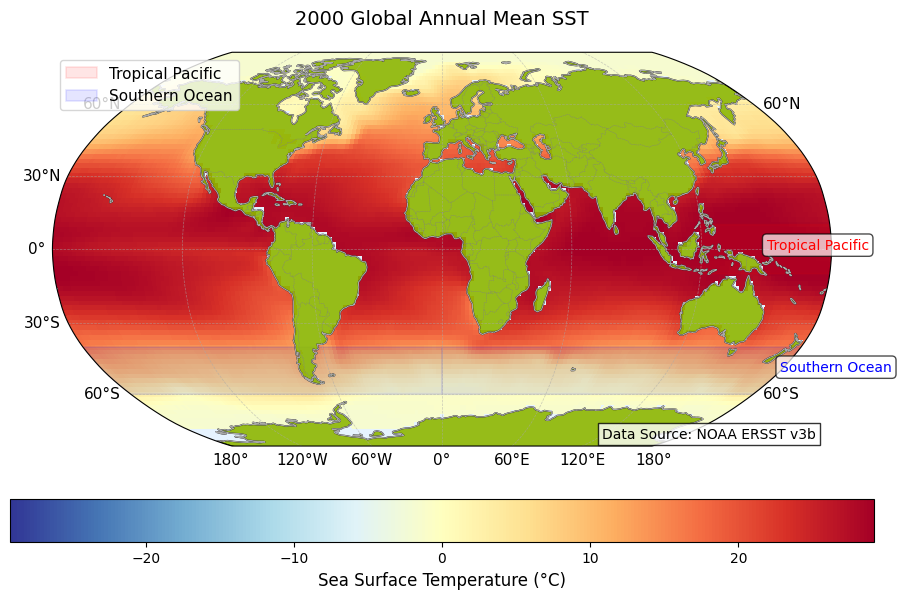

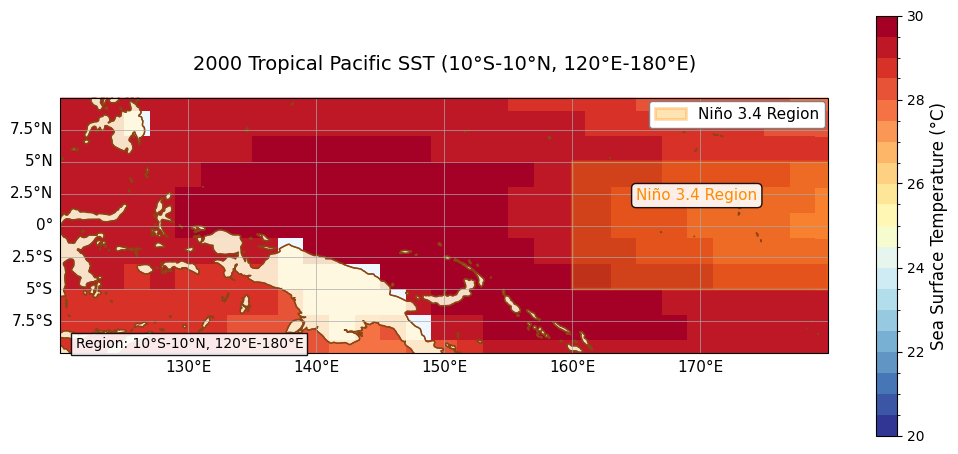

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='cartopy.mpl.feature_artist')

file_path = "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")
sst = ds['sst']
annual_sst_2000 = sst.groupby('time.year').mean(dim='time').sel(year=2000)
region_sst_2000 = sst.sel(lat=slice(-10, 10), lon=slice(120, 180)).groupby('time.year').mean(dim='time').sel(year=2000)

plt.close('all')

# ========== 图1：全球SST ==========
fig1, ax1 = plt.subplots(figsize=(12, 7), subplot_kw={'projection': ccrs.Robinson()})
ax1.patch.set_facecolor('#E6F3FF')
ax1.patch.set_alpha(1.0)

im1 = annual_sst_2000.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    robust=True,
    cmap='RdYlBu_r',
    add_colorbar=False
)
cbar1 = plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.1, shrink=0.8)
cbar1.set_label("Sea Surface Temperature (°C)", fontsize=12)
cbar1.ax.tick_params(labelsize=10)

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='black', facecolor='#8DB600', alpha=0.9)
ax1.add_feature(land_10m)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.8, color='darkgray')
ax1.add_feature(cfeature.BORDERS, linewidth=0.3, linestyle='--', color='gray')

tropical_pac_rect = plt.Rectangle((120, -10), 60, 20, transform=ccrs.PlateCarree(), facecolor='red', alpha=0.1, edgecolor='red', linewidth=1.2, label='Tropical Pacific')
ax1.add_patch(tropical_pac_rect)
ax1.text(150, 0, 'Tropical Pacific', transform=ccrs.PlateCarree(), fontsize=10, color='red', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

southern_ocean_rect = plt.Rectangle((0, -60), 360, 20, transform=ccrs.PlateCarree(), facecolor='blue', alpha=0.1, edgecolor='blue', linewidth=1.2, label='Southern Ocean')
ax1.add_patch(southern_ocean_rect)
ax1.text(180, -50, 'Southern Ocean', transform=ccrs.PlateCarree(), fontsize=10, color='blue', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax1.legend(loc='upper left', fontsize=11, framealpha=0.8)
ax1.set_title('2000 Global Annual Mean SST', fontsize=14, pad=20)
ax1.set_xlabel('Longitude', fontsize=12, labelpad=10)
ax1.set_ylabel('Latitude', fontsize=12, labelpad=10)

ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, alpha=0.6, linestyle='--', color='darkgray', xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-60, 61, 30))
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0)
gl1.left_labels = True; gl1.right_labels = False; gl1.top_labels = False; gl1.bottom_labels = True
gl1.xlabel_style = {'size': 11}; gl1.ylabel_style = {'size': 11}

ax1.text(0.98, 0.02, 'Data Source: NOAA ERSST v3b', transform=ax1.transAxes, fontsize=10, ha='right', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))

plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.15)
plt.show()
plt.close(fig1)

plt.close('all')

# ========== 图2：热带太平洋SST ==========
proj_region = ccrs.Mercator()
fig2, ax2 = plt.subplots(figsize=(12, 7), subplot_kw={'projection': proj_region})
ax2.patch.set_facecolor('#F0F8FF')
ax2.patch.set_alpha(1.0)

im2 = region_sst_2000.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    robust=True,
    cmap='RdYlBu_r',
    levels=np.linspace(20, 30, 21),
    add_colorbar=False,
    linewidth=0.5
)

cbar2 = plt.colorbar(im2, ax=ax2, orientation='vertical', pad=0.05, shrink=0.8, ticks=np.linspace(20, 30, 6))
cbar2.set_label("Sea Surface Temperature (°C)", fontsize=12)
cbar2.ax.tick_params(labelsize=10)


land_10m_region = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='#8B4513', facecolor='#FFF8DC', alpha=0.9)
ax2.add_feature(land_10m_region)
ax2.add_feature(cfeature.COASTLINE, linewidth=1.0, color='#8B4513')

# Niño3.4区域
nino34_rect = plt.Rectangle((160, -5), 30, 10, transform=ccrs.PlateCarree(), facecolor='orange', alpha=0.3, edgecolor='darkorange', linewidth=2.0, label='Niño 3.4 Region')
ax2.add_patch(nino34_rect)
ax2.text(165, 2, 'Niño 3.4 Region', transform=ccrs.PlateCarree(), fontsize=11, color='darkorange', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax2.legend(
    loc='upper right',
    fontsize=11,
    frameon=True,
    facecolor='white',
    edgecolor='gray',
    framealpha=1.0,
    handlelength=2.0,
    borderaxespad=0.2
)

ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.6, alpha=0.8, linestyle='-', color='darkgray', xlocs=np.arange(120, 181, 10), ylocs=np.arange(-10, 11, 2.5))
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0)
gl2.left_labels = True; gl2.right_labels = False; gl2.top_labels = False; gl2.bottom_labels = True
gl2.xlabel_style = {'size': 11}; gl2.ylabel_style = {'size': 11}

ax2.set_extent([120, 180, -10, 10], crs=ccrs.PlateCarree())
ax2.set_title('2000 Tropical Pacific SST (10°S-10°N, 120°E-180°E)', fontsize=14, pad=20)
ax2.set_xlabel('Longitude (°E)', fontsize=12, labelpad=10)
ax2.set_ylabel('Latitude (°N)', fontsize=12, labelpad=10)
ax2.text(0.02, 0.02, 'Region: 10°S-10°N, 120°E-180°E', transform=ax2.transAxes, fontsize=10, bbox=dict(boxstyle='square', facecolor='white', alpha=0.9))

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)

plt.show()
plt.close(fig2)